# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TensorFlow version
import tensorflow as tf
print(tf.__version__)

# training_file = "./traffic-signs-data/train_gamma_equalize_norm.p"
# validation_file= "./traffic-signs-data/valid_gamma_equalize_norm.p"
# testing_file = "./traffic-signs-data/test_gamma_equalize_norm.p"

training_file = "./traffic-signs-data/train.p"
validation_file= "./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

type(X_train)

1.2.1


numpy.ndarray

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape 

# How many unique classes/labels there are in the dataset.
n_classes = np.size(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validating examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validating examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
# Import .csv file with the labels of each class
import pandas as pd

signnames = pd.read_csv("./signnames.csv")
print(signnames)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

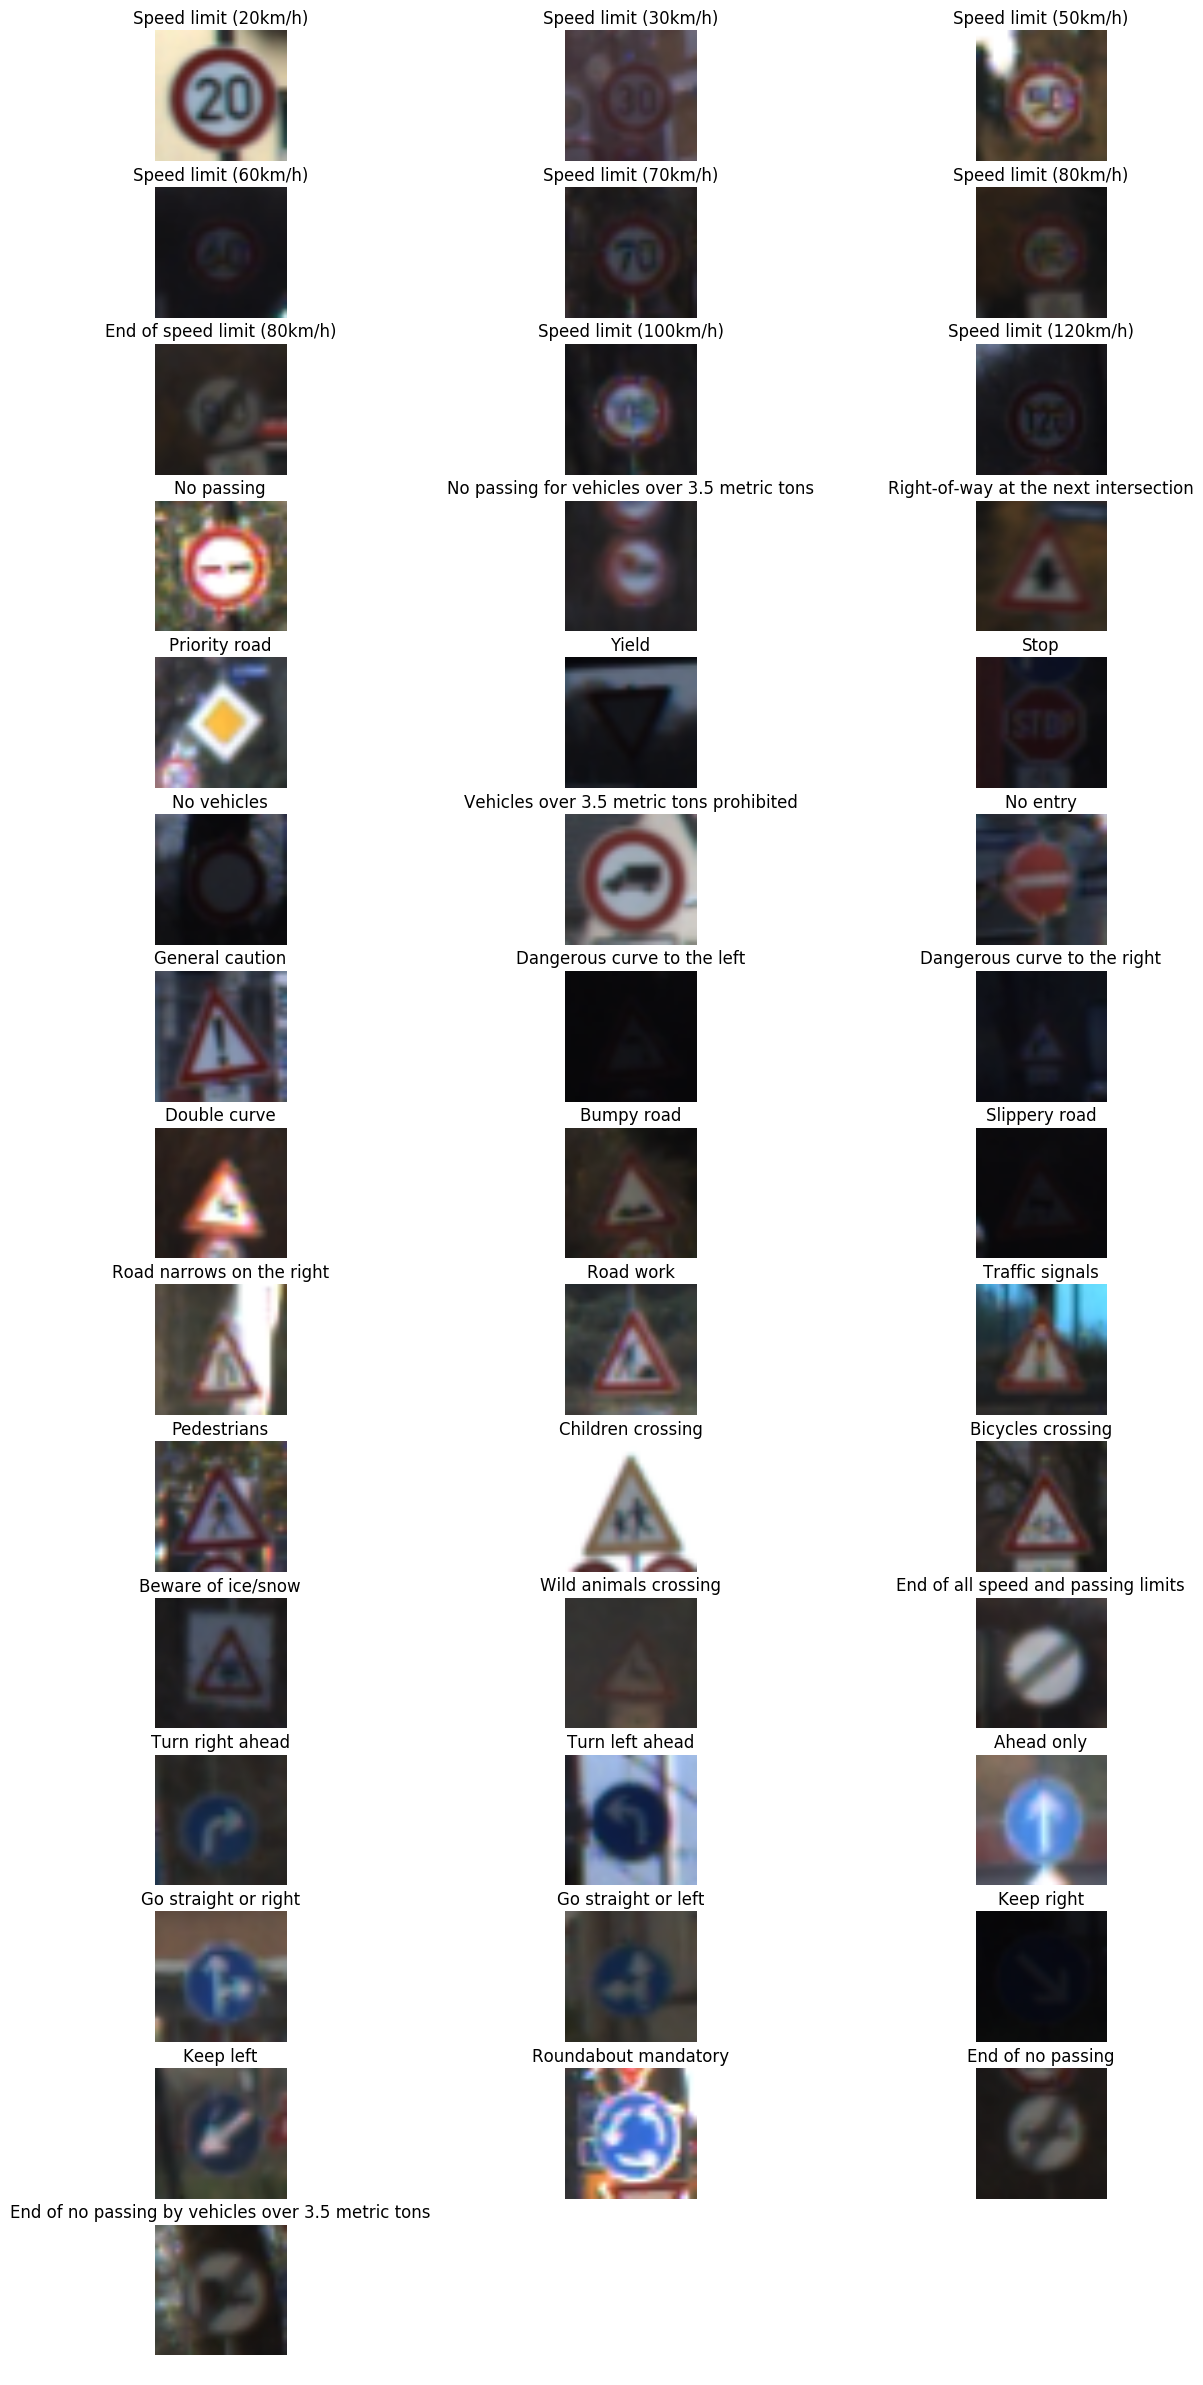

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
%matplotlib inline

def print_first_sample_each_class(X, y, index=0):
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    import numpy as np
    
    n_samples=[]
    plt.figure(figsize=(15, 30))
    
    # How many unique classes/labels there are in the dataset.
    n_classes = np.size(np.unique(y))
    
    for i in range(0, n_classes):
        plt.subplot(15, 3, i+1)
        x_selected = X[y == i]
        plt.imshow(x_selected[index, :, :, :])
        plt.title(signnames.SignName[i])
        plt.axis('off')
        n_samples.append(len(x_selected))
    plt.show()
    
print_first_sample_each_class(X=X_train, y=y_train, index=1)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

##### Helper Functions

In [5]:
def normalize_image(img):
    """Normalizes image
    This will return an image with zero mean"""
    #imgplot = plt.imshow(img)
    return img / 255.0 * 0.8 + 0.1

In [6]:
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    import cv2
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [7]:
def equalize_adapthist_image(image, clip_limit=0.03):
    from skimage import exposure
    # http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_adapthist
    # clip_limit : Clipping limit, normalized between 0 and 1 (higher values give more contrast).
    return exposure.equalize_adapthist(image, clip_limit=clip_limit)

In [8]:
def adjust_gamma_image(image, gamma=1):
    from skimage import exposure
    # http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_adapthist
    # clip_limit : Clipping limit, normalized between 0 and 1 (higher values give more contrast).
    return exposure.adjust_gamma(image, gamma=gamma)

In [9]:
def median_filter_image(image):
    from skimage.morphology import disk
    from skimage.filters.rank import median
    # http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median
    med = median(image, disk(5))
    
    return med

In [10]:
def preprocess_all_images(X):
    
    X = normalize_image(X)
    X = tf.image.adjust_gamma(image=X, gamma=0.9, gain=1)
    #X = tf.image.rgb_to_grayscale(images=X)
    X = tf.Session().run(X)
    
    #save_image(normalize_image(equalize_adapthist_image(adjust_gamma_image(X_preprocess[4000], gamma=1.7))), "./traffic-signs-data/train/ima7887ge9877.png")
    return X

In [11]:
def shuffleTrainingData(X, y):
    from sklearn.utils import shuffle
    return shuffle(X, y)

In [12]:

import warnings
warnings.filterwarnings("ignore")

In [13]:
# Pre-process images 
import gc

X_train = preprocess_all_images(X=X_train)
X_test = preprocess_all_images(X=X_test)
X_valid = preprocess_all_images(X=X_valid)

#tf.image.adjust_gamma(X_train)
gc.collect()

# print_first_sample_each_class(X=X_train, y=y_train)

X_train, y_train = shuffleTrainingData(X=X_train, y=y_train)

### Model Architecture

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 43 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

with tf.device('/gpu:0'):

    def LeNet(x):    
        # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
        mu = 0
        sigma = 0.1

        # SOLUTION: Layer 1
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
        conv1_b = tf.Variable(tf.zeros(6))
        conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

        # SOLUTION: Activation.
        conv1 = tf.nn.relu(conv1)

        # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
        conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        
        #conv1 = tf.nn.dropout(conv1, keep_prob_conv)

        # SOLUTION: Layer 2
        conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
        conv2_b = tf.Variable(tf.zeros(16))
        conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

        # SOLUTION: Activation.
        conv2 = tf.nn.relu(conv2)

        # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
        conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        
        #conv2 = tf.nn.dropout(conv2, keep_prob_conv)
        
        # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
        fc0   = flatten(conv2)

        # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 200.
        fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 200), mean = mu, stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(200))
        
        #print(fc1_W)
        fc1   = tf.matmul(fc0, fc1_W) + fc1_b

        # SOLUTION: Activation.
        fc1    = tf.nn.relu(fc1)
        #fc1 = tf.nn.dropout(fc1, keep_prob)

        # SOLUTION: Layer 4: Fully Connected. Input = 200. Output = 84.
        fc2_W  = tf.Variable(tf.truncated_normal(shape=(200, 120), mean = mu, stddev = sigma))
        fc2_b  = tf.Variable(tf.zeros(120))
        fc2    = tf.matmul(fc1, fc2_W) + fc2_b

        # SOLUTION: Activation.
        fc2    = tf.nn.relu(fc2)
        #fc2    = tf.nn.dropout(fc2, keep_prob)

        # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
        fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
        fc3_b  = tf.Variable(tf.zeros(43))
        logits = tf.matmul(fc2, fc3_W) + fc3_b

        return logits


## Features and Labels

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [15]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob_conv = tf.placeholder(tf.float32)
keep_prob = tf.placeholder(tf.float32)

In [16]:
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

starter_learning_rate = 0.001

EPOCHS = 200
BATCH_SIZE = 128

num_examples = len(X_train)
global_step = tf.Variable(0, trainable=False)
# https://www.tensorflow.org/api_guides/python/train#Decaying_the_learning_rate
# https://www.tensorflow.org/api_docs/python/tf/train/exponential_decay
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 50*num_examples/BATCH_SIZE, 0.1, staircase=True)

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation, global_step=global_step)

In [17]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.9, keep_prob_conv:0.9})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [25]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
from tqdm import tqdm

with tf.Session() as sess:
    #with tf.device("/gpu:0"): #GPUs are not enabled on the system so it throws an error
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in tqdm(range(0, EPOCHS, 1)):
        X_train, y_train = shuffle(X_train, y_train)

        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run([training_operation, learning_rate], feed_dict={x: batch_x, y: batch_y, keep_prob:0.9, keep_prob_conv:0.9})

        training_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Learning Rate {} ...".format(learning_rate.eval()))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
        validation_accuracy = evaluate(X_valid, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, './model')
    print("Model saved")

/bin/sh: pip: command not found


  0%|          | 0/200 [00:00<?, ?it/s]

Training...

EPOCH 1 ...
Learning Rate 0.0010000000474974513 ...
Global Step 272 ...
Training Accuracy = 0.771



  0%|          | 1/200 [00:17<57:44, 17.41s/it]

Validation Accuracy = 0.692

EPOCH 2 ...
Learning Rate 0.0010000000474974513 ...
Global Step 544 ...
Training Accuracy = 0.881



  1%|          | 2/200 [00:34<56:54, 17.25s/it]

Validation Accuracy = 0.822

EPOCH 3 ...
Learning Rate 0.0010000000474974513 ...
Global Step 816 ...
Training Accuracy = 0.923



  2%|▏         | 3/200 [00:51<56:13, 17.12s/it]

Validation Accuracy = 0.843

EPOCH 4 ...
Learning Rate 0.0010000000474974513 ...
Global Step 1088 ...
Training Accuracy = 0.945



  2%|▏         | 4/200 [01:08<55:50, 17.10s/it]

Validation Accuracy = 0.862

EPOCH 5 ...
Learning Rate 0.0010000000474974513 ...
Global Step 1360 ...
Training Accuracy = 0.964



  2%|▎         | 5/200 [01:25<55:20, 17.03s/it]

Validation Accuracy = 0.877

EPOCH 6 ...
Learning Rate 0.0010000000474974513 ...
Global Step 1632 ...
Training Accuracy = 0.973



  3%|▎         | 6/200 [01:41<54:51, 16.97s/it]

Validation Accuracy = 0.886

EPOCH 7 ...
Learning Rate 0.0010000000474974513 ...
Global Step 1904 ...
Training Accuracy = 0.973



  4%|▎         | 7/200 [01:58<54:37, 16.98s/it]

Validation Accuracy = 0.875

EPOCH 8 ...
Learning Rate 0.0010000000474974513 ...
Global Step 2176 ...
Training Accuracy = 0.976



  4%|▍         | 8/200 [02:15<54:20, 16.98s/it]

Validation Accuracy = 0.874

EPOCH 9 ...
Learning Rate 0.0010000000474974513 ...
Global Step 2448 ...
Training Accuracy = 0.980



  4%|▍         | 9/200 [02:32<54:02, 16.98s/it]

Validation Accuracy = 0.882

EPOCH 10 ...
Learning Rate 0.0010000000474974513 ...
Global Step 2720 ...
Training Accuracy = 0.989



  5%|▌         | 10/200 [02:49<53:29, 16.89s/it]

Validation Accuracy = 0.899

EPOCH 11 ...
Learning Rate 0.0010000000474974513 ...
Global Step 2992 ...
Training Accuracy = 0.990



  6%|▌         | 11/200 [03:06<53:18, 16.92s/it]

Validation Accuracy = 0.897

EPOCH 12 ...
Learning Rate 0.0010000000474974513 ...
Global Step 3264 ...
Training Accuracy = 0.986



  6%|▌         | 12/200 [03:23<52:54, 16.88s/it]

Validation Accuracy = 0.885

EPOCH 13 ...
Learning Rate 0.0010000000474974513 ...
Global Step 3536 ...
Training Accuracy = 0.993



  6%|▋         | 13/200 [03:40<52:29, 16.84s/it]

Validation Accuracy = 0.908

EPOCH 14 ...
Learning Rate 0.0010000000474974513 ...
Global Step 3808 ...
Training Accuracy = 0.991



  7%|▋         | 14/200 [03:56<52:00, 16.78s/it]

Validation Accuracy = 0.895

EPOCH 15 ...
Learning Rate 0.0010000000474974513 ...
Global Step 4080 ...
Training Accuracy = 0.992



  8%|▊         | 15/200 [04:13<51:39, 16.75s/it]

Validation Accuracy = 0.898

EPOCH 16 ...
Learning Rate 0.0010000000474974513 ...
Global Step 4352 ...
Training Accuracy = 0.995



  8%|▊         | 16/200 [04:30<51:22, 16.75s/it]

Validation Accuracy = 0.900

EPOCH 17 ...
Learning Rate 0.0010000000474974513 ...
Global Step 4624 ...
Training Accuracy = 0.995



  8%|▊         | 17/200 [04:46<51:09, 16.77s/it]

Validation Accuracy = 0.897

EPOCH 18 ...
Learning Rate 0.0010000000474974513 ...
Global Step 4896 ...
Training Accuracy = 0.970



  9%|▉         | 18/200 [05:03<51:01, 16.82s/it]

Validation Accuracy = 0.870

EPOCH 19 ...
Learning Rate 0.0010000000474974513 ...
Global Step 5168 ...
Training Accuracy = 0.993



 10%|▉         | 19/200 [05:20<50:38, 16.79s/it]

Validation Accuracy = 0.897

EPOCH 20 ...
Learning Rate 0.0010000000474974513 ...
Global Step 5440 ...
Training Accuracy = 0.994



 10%|█         | 20/200 [05:37<50:21, 16.78s/it]

Validation Accuracy = 0.910

EPOCH 21 ...
Learning Rate 0.0010000000474974513 ...
Global Step 5712 ...
Training Accuracy = 0.990



 10%|█         | 21/200 [05:54<50:07, 16.80s/it]

Validation Accuracy = 0.893

EPOCH 22 ...
Learning Rate 0.0010000000474974513 ...
Global Step 5984 ...
Training Accuracy = 0.991



 11%|█         | 22/200 [06:10<49:44, 16.77s/it]

Validation Accuracy = 0.901

EPOCH 23 ...
Learning Rate 0.0010000000474974513 ...
Global Step 6256 ...
Training Accuracy = 0.998



 12%|█▏        | 23/200 [06:27<49:30, 16.78s/it]

Validation Accuracy = 0.909

EPOCH 24 ...
Learning Rate 0.0010000000474974513 ...
Global Step 6528 ...
Training Accuracy = 0.995



 12%|█▏        | 24/200 [06:44<49:14, 16.78s/it]

Validation Accuracy = 0.917

EPOCH 25 ...
Learning Rate 0.0010000000474974513 ...
Global Step 6800 ...
Training Accuracy = 0.998



 12%|█▎        | 25/200 [07:01<49:06, 16.84s/it]

Validation Accuracy = 0.913

EPOCH 26 ...
Learning Rate 0.0010000000474974513 ...
Global Step 7072 ...
Training Accuracy = 0.999



 13%|█▎        | 26/200 [07:18<48:50, 16.84s/it]

Validation Accuracy = 0.912

EPOCH 27 ...
Learning Rate 0.0010000000474974513 ...
Global Step 7344 ...
Training Accuracy = 0.994



 14%|█▎        | 27/200 [07:35<48:31, 16.83s/it]

Validation Accuracy = 0.901

EPOCH 28 ...
Learning Rate 0.0010000000474974513 ...
Global Step 7616 ...
Training Accuracy = 0.996



 14%|█▍        | 28/200 [07:51<48:12, 16.82s/it]

Validation Accuracy = 0.905

EPOCH 29 ...
Learning Rate 0.0010000000474974513 ...
Global Step 7888 ...
Training Accuracy = 0.989



 14%|█▍        | 29/200 [08:08<47:54, 16.81s/it]

Validation Accuracy = 0.887

EPOCH 30 ...
Learning Rate 0.0010000000474974513 ...
Global Step 8160 ...
Training Accuracy = 0.998



 15%|█▌        | 30/200 [08:25<47:33, 16.78s/it]

Validation Accuracy = 0.920

EPOCH 31 ...
Learning Rate 0.0010000000474974513 ...
Global Step 8432 ...
Training Accuracy = 0.997



 16%|█▌        | 31/200 [08:42<47:15, 16.78s/it]

Validation Accuracy = 0.927

EPOCH 32 ...
Learning Rate 0.0010000000474974513 ...
Global Step 8704 ...
Training Accuracy = 0.990



 16%|█▌        | 32/200 [08:58<46:51, 16.73s/it]

Validation Accuracy = 0.901

EPOCH 33 ...
Learning Rate 0.0010000000474974513 ...
Global Step 8976 ...
Training Accuracy = 1.000



 16%|█▋        | 33/200 [09:15<46:36, 16.74s/it]

Validation Accuracy = 0.921

EPOCH 34 ...
Learning Rate 0.0010000000474974513 ...
Global Step 9248 ...
Training Accuracy = 0.994



 17%|█▋        | 34/200 [09:32<46:13, 16.71s/it]

Validation Accuracy = 0.909

EPOCH 35 ...
Learning Rate 0.0010000000474974513 ...
Global Step 9520 ...
Training Accuracy = 0.998



 18%|█▊        | 35/200 [09:48<45:56, 16.70s/it]

Validation Accuracy = 0.917

EPOCH 36 ...
Learning Rate 0.0010000000474974513 ...
Global Step 9792 ...
Training Accuracy = 0.999



 18%|█▊        | 36/200 [10:05<45:48, 16.76s/it]

Validation Accuracy = 0.915

EPOCH 37 ...
Learning Rate 0.0010000000474974513 ...
Global Step 10064 ...
Training Accuracy = 0.996



 18%|█▊        | 37/200 [10:22<45:28, 16.74s/it]

Validation Accuracy = 0.920

EPOCH 38 ...
Learning Rate 0.0010000000474974513 ...
Global Step 10336 ...
Training Accuracy = 0.999



 19%|█▉        | 38/200 [10:39<45:14, 16.76s/it]

Validation Accuracy = 0.926

EPOCH 39 ...
Learning Rate 0.0010000000474974513 ...
Global Step 10608 ...
Training Accuracy = 0.995



 20%|█▉        | 39/200 [10:55<44:47, 16.70s/it]

Validation Accuracy = 0.911

EPOCH 40 ...
Learning Rate 0.0010000000474974513 ...
Global Step 10880 ...
Training Accuracy = 0.998



 20%|██        | 40/200 [11:12<44:32, 16.70s/it]

Validation Accuracy = 0.928

EPOCH 41 ...
Learning Rate 0.0010000000474974513 ...
Global Step 11152 ...
Training Accuracy = 0.997



 20%|██        | 41/200 [11:29<44:10, 16.67s/it]

Validation Accuracy = 0.911

EPOCH 42 ...
Learning Rate 0.0010000000474974513 ...
Global Step 11424 ...
Training Accuracy = 0.998



 21%|██        | 42/200 [11:45<43:59, 16.70s/it]

Validation Accuracy = 0.912

EPOCH 43 ...
Learning Rate 0.0010000000474974513 ...
Global Step 11696 ...
Training Accuracy = 0.995



 22%|██▏       | 43/200 [12:02<43:42, 16.70s/it]

Validation Accuracy = 0.910

EPOCH 44 ...
Learning Rate 0.0010000000474974513 ...
Global Step 11968 ...
Training Accuracy = 0.997



 22%|██▏       | 44/200 [12:19<43:32, 16.75s/it]

Validation Accuracy = 0.916

EPOCH 45 ...
Learning Rate 0.0010000000474974513 ...
Global Step 12240 ...
Training Accuracy = 1.000



 22%|██▎       | 45/200 [12:36<43:28, 16.83s/it]

Validation Accuracy = 0.935

EPOCH 46 ...
Learning Rate 0.0010000000474974513 ...
Global Step 12512 ...
Training Accuracy = 1.000



 23%|██▎       | 46/200 [12:53<43:09, 16.82s/it]

Validation Accuracy = 0.931

EPOCH 47 ...
Learning Rate 0.0010000000474974513 ...
Global Step 12784 ...
Training Accuracy = 1.000



 24%|██▎       | 47/200 [13:10<43:02, 16.88s/it]

Validation Accuracy = 0.935

EPOCH 48 ...
Learning Rate 0.0010000000474974513 ...
Global Step 13056 ...
Training Accuracy = 1.000



 24%|██▍       | 48/200 [13:27<42:43, 16.86s/it]

Validation Accuracy = 0.936

EPOCH 49 ...
Learning Rate 0.0010000000474974513 ...
Global Step 13328 ...
Training Accuracy = 1.000



 24%|██▍       | 49/200 [13:43<42:24, 16.85s/it]

Validation Accuracy = 0.936

EPOCH 50 ...
Learning Rate 0.00010000000474974513 ...
Global Step 13600 ...
Training Accuracy = 1.000



 25%|██▌       | 50/200 [14:00<42:13, 16.89s/it]

Validation Accuracy = 0.937

EPOCH 51 ...
Learning Rate 0.00010000000474974513 ...
Global Step 13872 ...
Training Accuracy = 1.000



 26%|██▌       | 51/200 [14:17<41:53, 16.87s/it]

Validation Accuracy = 0.937

EPOCH 52 ...
Learning Rate 0.00010000000474974513 ...
Global Step 14144 ...
Training Accuracy = 1.000



 26%|██▌       | 52/200 [14:34<41:31, 16.84s/it]

Validation Accuracy = 0.937

EPOCH 53 ...
Learning Rate 0.00010000000474974513 ...
Global Step 14416 ...
Training Accuracy = 1.000



 26%|██▋       | 53/200 [14:51<41:10, 16.81s/it]

Validation Accuracy = 0.938

EPOCH 54 ...
Learning Rate 0.00010000000474974513 ...
Global Step 14688 ...
Training Accuracy = 1.000



 27%|██▋       | 54/200 [15:08<41:00, 16.85s/it]

Validation Accuracy = 0.937

EPOCH 55 ...
Learning Rate 0.00010000000474974513 ...
Global Step 14960 ...
Training Accuracy = 1.000



 28%|██▊       | 55/200 [15:24<40:40, 16.83s/it]

Validation Accuracy = 0.937

EPOCH 56 ...
Learning Rate 0.00010000000474974513 ...
Global Step 15232 ...
Training Accuracy = 1.000



 28%|██▊       | 56/200 [15:41<40:24, 16.84s/it]

Validation Accuracy = 0.937

EPOCH 57 ...
Learning Rate 0.00010000000474974513 ...
Global Step 15504 ...
Training Accuracy = 1.000



 28%|██▊       | 57/200 [15:58<40:04, 16.81s/it]

Validation Accuracy = 0.937

EPOCH 58 ...
Learning Rate 0.00010000000474974513 ...
Global Step 15776 ...
Training Accuracy = 1.000



 29%|██▉       | 58/200 [16:15<39:47, 16.82s/it]

Validation Accuracy = 0.937

EPOCH 59 ...
Learning Rate 0.00010000000474974513 ...
Global Step 16048 ...
Training Accuracy = 1.000



 30%|██▉       | 59/200 [16:32<39:23, 16.76s/it]

Validation Accuracy = 0.937

EPOCH 60 ...
Learning Rate 0.00010000000474974513 ...
Global Step 16320 ...
Training Accuracy = 1.000



 30%|███       | 60/200 [16:48<39:00, 16.72s/it]

Validation Accuracy = 0.937

EPOCH 61 ...
Learning Rate 0.00010000000474974513 ...
Global Step 16592 ...
Training Accuracy = 1.000



 30%|███       | 61/200 [17:05<38:43, 16.72s/it]

Validation Accuracy = 0.938

EPOCH 62 ...
Learning Rate 0.00010000000474974513 ...
Global Step 16864 ...
Training Accuracy = 1.000



 31%|███       | 62/200 [17:22<38:27, 16.72s/it]

Validation Accuracy = 0.938

EPOCH 63 ...
Learning Rate 0.00010000000474974513 ...
Global Step 17136 ...
Training Accuracy = 1.000



 32%|███▏      | 63/200 [17:38<38:12, 16.74s/it]

Validation Accuracy = 0.939

EPOCH 64 ...
Learning Rate 0.00010000000474974513 ...
Global Step 17408 ...
Training Accuracy = 1.000



 32%|███▏      | 64/200 [17:55<37:59, 16.76s/it]

Validation Accuracy = 0.939

EPOCH 65 ...
Learning Rate 0.00010000000474974513 ...
Global Step 17680 ...
Training Accuracy = 1.000



 32%|███▎      | 65/200 [18:12<37:42, 16.76s/it]

Validation Accuracy = 0.939

EPOCH 66 ...
Learning Rate 0.00010000000474974513 ...
Global Step 17952 ...
Training Accuracy = 1.000



 33%|███▎      | 66/200 [18:29<37:20, 16.72s/it]

Validation Accuracy = 0.941

EPOCH 67 ...
Learning Rate 0.00010000000474974513 ...
Global Step 18224 ...
Training Accuracy = 1.000



 34%|███▎      | 67/200 [18:45<37:02, 16.71s/it]

Validation Accuracy = 0.941

EPOCH 68 ...
Learning Rate 0.00010000000474974513 ...
Global Step 18496 ...
Training Accuracy = 1.000



 34%|███▍      | 68/200 [19:02<36:46, 16.72s/it]

Validation Accuracy = 0.940

EPOCH 69 ...
Learning Rate 0.00010000000474974513 ...
Global Step 18768 ...
Training Accuracy = 1.000



 34%|███▍      | 69/200 [19:19<36:36, 16.76s/it]

Validation Accuracy = 0.939

EPOCH 70 ...
Learning Rate 0.00010000000474974513 ...
Global Step 19040 ...
Training Accuracy = 1.000



 35%|███▌      | 70/200 [19:36<36:19, 16.77s/it]

Validation Accuracy = 0.940

EPOCH 71 ...
Learning Rate 0.00010000000474974513 ...
Global Step 19312 ...
Training Accuracy = 1.000



 36%|███▌      | 71/200 [19:53<36:07, 16.80s/it]

Validation Accuracy = 0.940

EPOCH 72 ...
Learning Rate 0.00010000000474974513 ...
Global Step 19584 ...
Training Accuracy = 1.000



 36%|███▌      | 72/200 [20:10<35:58, 16.86s/it]

Validation Accuracy = 0.941

EPOCH 73 ...
Learning Rate 0.00010000000474974513 ...
Global Step 19856 ...
Training Accuracy = 1.000



 36%|███▋      | 73/200 [20:26<35:38, 16.84s/it]

Validation Accuracy = 0.940

EPOCH 74 ...
Learning Rate 0.00010000000474974513 ...
Global Step 20128 ...
Training Accuracy = 1.000



 37%|███▋      | 74/200 [20:43<35:18, 16.81s/it]

Validation Accuracy = 0.940

EPOCH 75 ...
Learning Rate 0.00010000000474974513 ...
Global Step 20400 ...
Training Accuracy = 1.000



 38%|███▊      | 75/200 [21:00<34:55, 16.76s/it]

Validation Accuracy = 0.941

EPOCH 76 ...
Learning Rate 0.00010000000474974513 ...
Global Step 20672 ...
Training Accuracy = 1.000



 38%|███▊      | 76/200 [21:16<34:37, 16.76s/it]

Validation Accuracy = 0.941

EPOCH 77 ...
Learning Rate 0.00010000000474974513 ...
Global Step 20944 ...
Training Accuracy = 1.000



 38%|███▊      | 77/200 [21:33<34:14, 16.70s/it]

Validation Accuracy = 0.941

EPOCH 78 ...
Learning Rate 0.00010000000474974513 ...
Global Step 21216 ...
Training Accuracy = 1.000



 39%|███▉      | 78/200 [21:50<33:55, 16.68s/it]

Validation Accuracy = 0.941

EPOCH 79 ...
Learning Rate 0.00010000000474974513 ...
Global Step 21488 ...
Training Accuracy = 1.000



 40%|███▉      | 79/200 [22:07<33:45, 16.74s/it]

Validation Accuracy = 0.942

EPOCH 80 ...
Learning Rate 0.00010000000474974513 ...
Global Step 21760 ...
Training Accuracy = 1.000



 40%|████      | 80/200 [22:23<33:28, 16.74s/it]

Validation Accuracy = 0.940

EPOCH 81 ...
Learning Rate 0.00010000000474974513 ...
Global Step 22032 ...
Training Accuracy = 1.000



 40%|████      | 81/200 [22:40<33:08, 16.71s/it]

Validation Accuracy = 0.942

EPOCH 82 ...
Learning Rate 0.00010000000474974513 ...
Global Step 22304 ...
Training Accuracy = 1.000



 41%|████      | 82/200 [22:57<32:49, 16.69s/it]

Validation Accuracy = 0.941

EPOCH 83 ...
Learning Rate 0.00010000000474974513 ...
Global Step 22576 ...
Training Accuracy = 1.000



 42%|████▏     | 83/200 [23:13<32:41, 16.76s/it]

Validation Accuracy = 0.941

EPOCH 84 ...
Learning Rate 0.00010000000474974513 ...
Global Step 22848 ...
Training Accuracy = 1.000



 42%|████▏     | 84/200 [23:30<32:24, 16.77s/it]

Validation Accuracy = 0.939

EPOCH 85 ...
Learning Rate 0.00010000000474974513 ...
Global Step 23120 ...
Training Accuracy = 1.000



 42%|████▎     | 85/200 [23:47<32:01, 16.71s/it]

Validation Accuracy = 0.942

EPOCH 86 ...
Learning Rate 0.00010000000474974513 ...
Global Step 23392 ...
Training Accuracy = 1.000



 43%|████▎     | 86/200 [24:04<31:48, 16.74s/it]

Validation Accuracy = 0.941

EPOCH 87 ...
Learning Rate 0.00010000000474974513 ...
Global Step 23664 ...
Training Accuracy = 1.000



 44%|████▎     | 87/200 [24:20<31:31, 16.74s/it]

Validation Accuracy = 0.942

EPOCH 88 ...
Learning Rate 0.00010000000474974513 ...
Global Step 23936 ...
Training Accuracy = 1.000



 44%|████▍     | 88/200 [24:37<31:14, 16.74s/it]

Validation Accuracy = 0.941

EPOCH 89 ...
Learning Rate 0.00010000000474974513 ...
Global Step 24208 ...
Training Accuracy = 1.000



 44%|████▍     | 89/200 [24:54<30:54, 16.70s/it]

Validation Accuracy = 0.941

EPOCH 90 ...
Learning Rate 0.00010000000474974513 ...
Global Step 24480 ...
Training Accuracy = 1.000



 45%|████▌     | 90/200 [25:11<30:47, 16.80s/it]

Validation Accuracy = 0.942

EPOCH 91 ...
Learning Rate 0.00010000000474974513 ...
Global Step 24752 ...
Training Accuracy = 1.000



 46%|████▌     | 91/200 [25:28<30:29, 16.79s/it]

Validation Accuracy = 0.940

EPOCH 92 ...
Learning Rate 0.00010000000474974513 ...
Global Step 25024 ...
Training Accuracy = 1.000



 46%|████▌     | 92/200 [25:44<30:13, 16.79s/it]

Validation Accuracy = 0.941

EPOCH 93 ...
Learning Rate 0.00010000000474974513 ...
Global Step 25296 ...
Training Accuracy = 1.000



 46%|████▋     | 93/200 [26:01<29:54, 16.77s/it]

Validation Accuracy = 0.940

EPOCH 94 ...
Learning Rate 0.00010000000474974513 ...
Global Step 25568 ...
Training Accuracy = 1.000



 47%|████▋     | 94/200 [26:18<29:34, 16.74s/it]

Validation Accuracy = 0.942

EPOCH 95 ...
Learning Rate 0.00010000000474974513 ...
Global Step 25840 ...
Training Accuracy = 1.000



 48%|████▊     | 95/200 [26:34<29:12, 16.69s/it]

Validation Accuracy = 0.942

EPOCH 96 ...
Learning Rate 0.00010000000474974513 ...
Global Step 26112 ...
Training Accuracy = 1.000



 48%|████▊     | 96/200 [26:51<28:56, 16.70s/it]

Validation Accuracy = 0.940

EPOCH 97 ...
Learning Rate 0.00010000000474974513 ...
Global Step 26384 ...
Training Accuracy = 1.000



 48%|████▊     | 97/200 [27:08<28:46, 16.76s/it]

Validation Accuracy = 0.939

EPOCH 98 ...
Learning Rate 0.00010000000474974513 ...
Global Step 26656 ...
Training Accuracy = 1.000



 49%|████▉     | 98/200 [27:25<28:32, 16.79s/it]

Validation Accuracy = 0.939

EPOCH 99 ...
Learning Rate 0.00010000000474974513 ...
Global Step 26928 ...
Training Accuracy = 1.000



 50%|████▉     | 99/200 [27:41<28:13, 16.77s/it]

Validation Accuracy = 0.940

EPOCH 100 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 27200 ...
Training Accuracy = 1.000



 50%|█████     | 100/200 [27:58<27:55, 16.76s/it]

Validation Accuracy = 0.939

EPOCH 101 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 27472 ...
Training Accuracy = 1.000



 50%|█████     | 101/200 [28:15<27:44, 16.82s/it]

Validation Accuracy = 0.939

EPOCH 102 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 27744 ...
Training Accuracy = 1.000



 51%|█████     | 102/200 [28:32<27:24, 16.78s/it]

Validation Accuracy = 0.939

EPOCH 103 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 28016 ...
Training Accuracy = 1.000



 52%|█████▏    | 103/200 [28:49<27:03, 16.74s/it]

Validation Accuracy = 0.939

EPOCH 104 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 28288 ...
Training Accuracy = 1.000



 52%|█████▏    | 104/200 [29:05<26:43, 16.70s/it]

Validation Accuracy = 0.939

EPOCH 105 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 28560 ...
Training Accuracy = 1.000



 52%|█████▎    | 105/200 [29:22<26:27, 16.71s/it]

Validation Accuracy = 0.939

EPOCH 106 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 28832 ...
Training Accuracy = 1.000



 53%|█████▎    | 106/200 [29:38<26:07, 16.67s/it]

Validation Accuracy = 0.938

EPOCH 107 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 29104 ...
Training Accuracy = 1.000



 54%|█████▎    | 107/200 [29:55<25:52, 16.69s/it]

Validation Accuracy = 0.939

EPOCH 108 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 29376 ...
Training Accuracy = 1.000



 54%|█████▍    | 108/200 [30:12<25:37, 16.72s/it]

Validation Accuracy = 0.939

EPOCH 109 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 29648 ...
Training Accuracy = 1.000



 55%|█████▍    | 109/200 [30:29<25:22, 16.73s/it]

Validation Accuracy = 0.939

EPOCH 110 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 29920 ...
Training Accuracy = 1.000



 55%|█████▌    | 110/200 [30:46<25:08, 16.76s/it]

Validation Accuracy = 0.939

EPOCH 111 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 30192 ...
Training Accuracy = 1.000



 56%|█████▌    | 111/200 [31:02<24:52, 16.77s/it]

Validation Accuracy = 0.939

EPOCH 112 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 30464 ...
Training Accuracy = 1.000



 56%|█████▌    | 112/200 [31:19<24:38, 16.81s/it]

Validation Accuracy = 0.940

EPOCH 113 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 30736 ...
Training Accuracy = 1.000



 56%|█████▋    | 113/200 [31:36<24:18, 16.76s/it]

Validation Accuracy = 0.940

EPOCH 114 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 31008 ...
Training Accuracy = 1.000



 57%|█████▋    | 114/200 [31:53<24:00, 16.75s/it]

Validation Accuracy = 0.939

EPOCH 115 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 31280 ...
Training Accuracy = 1.000



 57%|█████▊    | 115/200 [32:09<23:45, 16.77s/it]

Validation Accuracy = 0.939

EPOCH 116 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 31552 ...
Training Accuracy = 1.000



 58%|█████▊    | 116/200 [32:26<23:27, 16.76s/it]

Validation Accuracy = 0.939

EPOCH 117 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 31824 ...
Training Accuracy = 1.000



 58%|█████▊    | 117/200 [32:43<23:09, 16.74s/it]

Validation Accuracy = 0.939

EPOCH 118 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 32096 ...
Training Accuracy = 1.000



 59%|█████▉    | 118/200 [33:00<22:53, 16.76s/it]

Validation Accuracy = 0.939

EPOCH 119 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 32368 ...
Training Accuracy = 1.000



 60%|█████▉    | 119/200 [33:16<22:39, 16.78s/it]

Validation Accuracy = 0.939

EPOCH 120 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 32640 ...
Training Accuracy = 1.000



 60%|██████    | 120/200 [33:33<22:22, 16.78s/it]

Validation Accuracy = 0.939

EPOCH 121 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 32912 ...
Training Accuracy = 1.000



 60%|██████    | 121/200 [33:50<21:57, 16.68s/it]

Validation Accuracy = 0.939

EPOCH 122 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 33184 ...
Training Accuracy = 1.000



 61%|██████    | 122/200 [34:07<21:45, 16.73s/it]

Validation Accuracy = 0.940

EPOCH 123 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 33456 ...
Training Accuracy = 1.000



 62%|██████▏   | 123/200 [34:23<21:31, 16.78s/it]

Validation Accuracy = 0.939

EPOCH 124 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 33728 ...
Training Accuracy = 1.000



 62%|██████▏   | 124/200 [34:40<21:15, 16.79s/it]

Validation Accuracy = 0.939

EPOCH 125 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 34000 ...
Training Accuracy = 1.000



 62%|██████▎   | 125/200 [34:57<20:58, 16.78s/it]

Validation Accuracy = 0.939

EPOCH 126 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 34272 ...
Training Accuracy = 1.000



 63%|██████▎   | 126/200 [35:14<20:38, 16.74s/it]

Validation Accuracy = 0.938

EPOCH 127 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 34544 ...
Training Accuracy = 1.000



 64%|██████▎   | 127/200 [35:30<20:18, 16.69s/it]

Validation Accuracy = 0.939

EPOCH 128 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 34816 ...
Training Accuracy = 1.000



 64%|██████▍   | 128/200 [35:47<19:57, 16.64s/it]

Validation Accuracy = 0.939

EPOCH 129 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 35088 ...
Training Accuracy = 1.000



 64%|██████▍   | 129/200 [36:03<19:40, 16.63s/it]

Validation Accuracy = 0.939

EPOCH 130 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 35360 ...
Training Accuracy = 1.000



 65%|██████▌   | 130/200 [36:20<19:23, 16.62s/it]

Validation Accuracy = 0.939

EPOCH 131 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 35632 ...
Training Accuracy = 1.000



 66%|██████▌   | 131/200 [36:37<19:05, 16.61s/it]

Validation Accuracy = 0.938

EPOCH 132 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 35904 ...
Training Accuracy = 1.000



 66%|██████▌   | 132/200 [36:53<18:50, 16.63s/it]

Validation Accuracy = 0.939

EPOCH 133 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 36176 ...
Training Accuracy = 1.000



 66%|██████▋   | 133/200 [37:10<18:34, 16.64s/it]

Validation Accuracy = 0.939

EPOCH 134 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 36448 ...
Training Accuracy = 1.000



 67%|██████▋   | 134/200 [37:27<18:18, 16.64s/it]

Validation Accuracy = 0.939

EPOCH 135 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 36720 ...
Training Accuracy = 1.000



 68%|██████▊   | 135/200 [37:43<18:03, 16.67s/it]

Validation Accuracy = 0.939

EPOCH 136 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 36992 ...
Training Accuracy = 1.000



 68%|██████▊   | 136/200 [38:00<17:48, 16.69s/it]

Validation Accuracy = 0.938

EPOCH 137 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 37264 ...
Training Accuracy = 1.000



 68%|██████▊   | 137/200 [38:17<17:32, 16.70s/it]

Validation Accuracy = 0.938

EPOCH 138 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 37536 ...
Training Accuracy = 1.000



 69%|██████▉   | 138/200 [38:33<17:13, 16.67s/it]

Validation Accuracy = 0.938

EPOCH 139 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 37808 ...
Training Accuracy = 1.000



 70%|██████▉   | 139/200 [38:50<16:57, 16.67s/it]

Validation Accuracy = 0.939

EPOCH 140 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 38080 ...
Training Accuracy = 1.000



 70%|███████   | 140/200 [39:07<16:39, 16.66s/it]

Validation Accuracy = 0.938

EPOCH 141 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 38352 ...
Training Accuracy = 1.000



 70%|███████   | 141/200 [39:23<16:21, 16.64s/it]

Validation Accuracy = 0.939

EPOCH 142 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 38624 ...
Training Accuracy = 1.000



 71%|███████   | 142/200 [39:40<16:02, 16.60s/it]

Validation Accuracy = 0.939

EPOCH 143 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 38896 ...
Training Accuracy = 1.000



 72%|███████▏  | 143/200 [39:56<15:47, 16.61s/it]

Validation Accuracy = 0.938

EPOCH 144 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 39168 ...
Training Accuracy = 1.000



 72%|███████▏  | 144/200 [40:13<15:32, 16.66s/it]

Validation Accuracy = 0.938

EPOCH 145 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 39440 ...
Training Accuracy = 1.000



 72%|███████▎  | 145/200 [40:30<15:14, 16.62s/it]

Validation Accuracy = 0.938

EPOCH 146 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 39712 ...
Training Accuracy = 1.000



 73%|███████▎  | 146/200 [40:46<14:55, 16.59s/it]

Validation Accuracy = 0.939

EPOCH 147 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 39984 ...
Training Accuracy = 1.000



 74%|███████▎  | 147/200 [41:03<14:39, 16.60s/it]

Validation Accuracy = 0.937

EPOCH 148 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 40256 ...
Training Accuracy = 1.000



 74%|███████▍  | 148/200 [41:19<14:23, 16.61s/it]

Validation Accuracy = 0.938

EPOCH 149 ...
Learning Rate 1.0000001566368155e-05 ...
Global Step 40528 ...
Training Accuracy = 1.000



 74%|███████▍  | 149/200 [41:36<14:05, 16.58s/it]

Validation Accuracy = 0.939

EPOCH 150 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 40800 ...
Training Accuracy = 1.000



 75%|███████▌  | 150/200 [41:53<13:48, 16.58s/it]

Validation Accuracy = 0.939

EPOCH 151 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 41072 ...
Training Accuracy = 1.000



 76%|███████▌  | 151/200 [42:09<13:33, 16.61s/it]

Validation Accuracy = 0.939

EPOCH 152 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 41344 ...
Training Accuracy = 1.000



 76%|███████▌  | 152/200 [42:26<13:21, 16.69s/it]

Validation Accuracy = 0.938

EPOCH 153 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 41616 ...
Training Accuracy = 1.000



 76%|███████▋  | 153/200 [42:43<13:04, 16.69s/it]

Validation Accuracy = 0.938

EPOCH 154 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 41888 ...
Training Accuracy = 1.000



 77%|███████▋  | 154/200 [42:59<12:47, 16.69s/it]

Validation Accuracy = 0.938

EPOCH 155 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 42160 ...
Training Accuracy = 1.000



 78%|███████▊  | 155/200 [43:16<12:30, 16.67s/it]

Validation Accuracy = 0.938

EPOCH 156 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 42432 ...
Training Accuracy = 1.000



 78%|███████▊  | 156/200 [43:33<12:13, 16.68s/it]

Validation Accuracy = 0.938

EPOCH 157 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 42704 ...
Training Accuracy = 1.000



 78%|███████▊  | 157/200 [43:49<11:54, 16.62s/it]

Validation Accuracy = 0.938

EPOCH 158 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 42976 ...
Training Accuracy = 1.000



 79%|███████▉  | 158/200 [44:06<11:38, 16.62s/it]

Validation Accuracy = 0.938

EPOCH 159 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 43248 ...
Training Accuracy = 1.000



 80%|███████▉  | 159/200 [44:23<11:22, 16.66s/it]

Validation Accuracy = 0.938

EPOCH 160 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 43520 ...
Training Accuracy = 1.000



 80%|████████  | 160/200 [44:39<11:03, 16.59s/it]

Validation Accuracy = 0.938

EPOCH 161 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 43792 ...
Training Accuracy = 1.000



 80%|████████  | 161/200 [44:56<10:47, 16.60s/it]

Validation Accuracy = 0.938

EPOCH 162 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 44064 ...
Training Accuracy = 1.000



 81%|████████  | 162/200 [45:12<10:31, 16.61s/it]

Validation Accuracy = 0.938

EPOCH 163 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 44336 ...
Training Accuracy = 1.000



 82%|████████▏ | 163/200 [45:29<10:14, 16.60s/it]

Validation Accuracy = 0.938

EPOCH 164 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 44608 ...
Training Accuracy = 1.000



 82%|████████▏ | 164/200 [45:45<09:57, 16.60s/it]

Validation Accuracy = 0.938

EPOCH 165 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 44880 ...
Training Accuracy = 1.000



 82%|████████▎ | 165/200 [46:02<09:42, 16.65s/it]

Validation Accuracy = 0.938

EPOCH 166 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 45152 ...
Training Accuracy = 1.000



 83%|████████▎ | 166/200 [46:19<09:26, 16.66s/it]

Validation Accuracy = 0.938

EPOCH 167 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 45424 ...
Training Accuracy = 1.000



 84%|████████▎ | 167/200 [46:35<09:08, 16.61s/it]

Validation Accuracy = 0.938

EPOCH 168 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 45696 ...
Training Accuracy = 1.000



 84%|████████▍ | 168/200 [46:52<08:51, 16.60s/it]

Validation Accuracy = 0.938

EPOCH 169 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 45968 ...
Training Accuracy = 1.000



 84%|████████▍ | 169/200 [47:09<08:34, 16.59s/it]

Validation Accuracy = 0.938

EPOCH 170 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 46240 ...
Training Accuracy = 1.000



 85%|████████▌ | 170/200 [47:25<08:18, 16.61s/it]

Validation Accuracy = 0.938

EPOCH 171 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 46512 ...
Training Accuracy = 1.000



 86%|████████▌ | 171/200 [47:42<08:03, 16.67s/it]

Validation Accuracy = 0.938

EPOCH 172 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 46784 ...
Training Accuracy = 1.000



 86%|████████▌ | 172/200 [47:59<07:48, 16.72s/it]

Validation Accuracy = 0.938

EPOCH 173 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 47056 ...
Training Accuracy = 1.000



 86%|████████▋ | 173/200 [48:16<07:31, 16.73s/it]

Validation Accuracy = 0.938

EPOCH 174 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 47328 ...
Training Accuracy = 1.000



 87%|████████▋ | 174/200 [48:32<07:14, 16.71s/it]

Validation Accuracy = 0.938

EPOCH 175 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 47600 ...
Training Accuracy = 1.000



 88%|████████▊ | 175/200 [48:49<06:57, 16.71s/it]

Validation Accuracy = 0.938

EPOCH 176 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 47872 ...
Training Accuracy = 1.000



 88%|████████▊ | 176/200 [49:06<06:40, 16.69s/it]

Validation Accuracy = 0.938

EPOCH 177 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 48144 ...
Training Accuracy = 1.000



 88%|████████▊ | 177/200 [49:22<06:23, 16.67s/it]

Validation Accuracy = 0.938

EPOCH 178 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 48416 ...
Training Accuracy = 1.000



 89%|████████▉ | 178/200 [49:39<06:06, 16.67s/it]

Validation Accuracy = 0.938

EPOCH 179 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 48688 ...
Training Accuracy = 1.000



 90%|████████▉ | 179/200 [49:56<05:49, 16.65s/it]

Validation Accuracy = 0.938

EPOCH 180 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 48960 ...
Training Accuracy = 1.000



 90%|█████████ | 180/200 [50:12<05:32, 16.63s/it]

Validation Accuracy = 0.938

EPOCH 181 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 49232 ...
Training Accuracy = 1.000



 90%|█████████ | 181/200 [50:29<05:16, 16.64s/it]

Validation Accuracy = 0.938

EPOCH 182 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 49504 ...
Training Accuracy = 1.000



 91%|█████████ | 182/200 [50:45<04:59, 16.63s/it]

Validation Accuracy = 0.938

EPOCH 183 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 49776 ...
Training Accuracy = 1.000



 92%|█████████▏| 183/200 [51:02<04:43, 16.65s/it]

Validation Accuracy = 0.938

EPOCH 184 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 50048 ...
Training Accuracy = 1.000



 92%|█████████▏| 184/200 [51:19<04:26, 16.67s/it]

Validation Accuracy = 0.938

EPOCH 185 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 50320 ...
Training Accuracy = 1.000



 92%|█████████▎| 185/200 [51:36<04:10, 16.71s/it]

Validation Accuracy = 0.937

EPOCH 186 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 50592 ...
Training Accuracy = 1.000



 93%|█████████▎| 186/200 [51:52<03:53, 16.71s/it]

Validation Accuracy = 0.937

EPOCH 187 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 50864 ...
Training Accuracy = 1.000



 94%|█████████▎| 187/200 [52:09<03:36, 16.67s/it]

Validation Accuracy = 0.938

EPOCH 188 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 51136 ...
Training Accuracy = 1.000



 94%|█████████▍| 188/200 [52:26<03:20, 16.71s/it]

Validation Accuracy = 0.937

EPOCH 189 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 51408 ...
Training Accuracy = 1.000



 94%|█████████▍| 189/200 [52:42<03:04, 16.73s/it]

Validation Accuracy = 0.937

EPOCH 190 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 51680 ...
Training Accuracy = 1.000



 95%|█████████▌| 190/200 [52:59<02:47, 16.70s/it]

Validation Accuracy = 0.937

EPOCH 191 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 51952 ...
Training Accuracy = 1.000



 96%|█████████▌| 191/200 [53:16<02:30, 16.69s/it]

Validation Accuracy = 0.937

EPOCH 192 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 52224 ...
Training Accuracy = 1.000



 96%|█████████▌| 192/200 [53:32<02:13, 16.68s/it]

Validation Accuracy = 0.937

EPOCH 193 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 52496 ...
Training Accuracy = 1.000



 96%|█████████▋| 193/200 [53:49<01:57, 16.78s/it]

Validation Accuracy = 0.937

EPOCH 194 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 52768 ...
Training Accuracy = 1.000



 97%|█████████▋| 194/200 [54:06<01:40, 16.79s/it]

Validation Accuracy = 0.937

EPOCH 195 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 53040 ...
Training Accuracy = 1.000



 98%|█████████▊| 195/200 [54:23<01:23, 16.75s/it]

Validation Accuracy = 0.937

EPOCH 196 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 53312 ...
Training Accuracy = 1.000



 98%|█████████▊| 196/200 [54:40<01:07, 16.80s/it]

Validation Accuracy = 0.937

EPOCH 197 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 53584 ...
Training Accuracy = 1.000



 98%|█████████▊| 197/200 [54:57<00:50, 16.77s/it]

Validation Accuracy = 0.937

EPOCH 198 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 53856 ...
Training Accuracy = 1.000



 99%|█████████▉| 198/200 [55:13<00:33, 16.74s/it]

Validation Accuracy = 0.937

EPOCH 199 ...
Learning Rate 1.0000001111620804e-06 ...
Global Step 54128 ...
Training Accuracy = 1.000



100%|█████████▉| 199/200 [55:30<00:16, 16.71s/it]

Validation Accuracy = 0.937

EPOCH 200 ...
Learning Rate 1.000000082740371e-07 ...
Global Step 54400 ...
Training Accuracy = 1.000



100%|██████████| 200/200 [55:47<00:00, 16.70s/it]

Validation Accuracy = 0.937



Model saved


### Test Accuracy

In [26]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./model
Test Accuracy = 0.925


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

32
32
32
32
32
32
32
32
32
32


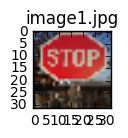

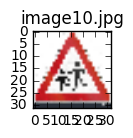

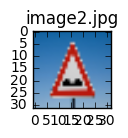

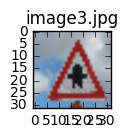

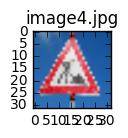

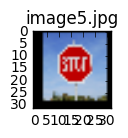

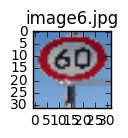

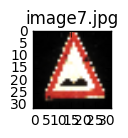

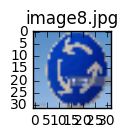

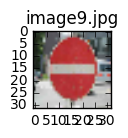

In [39]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
#importing some useful packages
import matplotlib.pyplot as plt
plt.rcdefaults()
import matplotlib.image as mpimg
import numpy as np
import os
import cv2
%matplotlib inline

X_final_test = []
X_final_test_name = []

def pipeline(img):
    global X_final_test
    
    #Resize for consistency
    resize_image = cv2.resize(img, (32, 32))
    #Convert to 3 channels
    resize_image = cv2.cvtColor(resize_image, cv2.COLOR_BGRA2BGR) 
    
    processed_img = preprocess_all_images(resize_image)
    X_final_test.append(processed_img)

    return resize_image

#printing out some stats and plotting
plt.close("all")
for file in sorted(os.listdir("data/")):
    plt.figure(figsize=(1,1))
    plt.title(file)
    plt.imshow(pipeline(mpimg.imread('data/' + file)))    
#     plt.figure()
#     plt.title(file + "(Original)")
#     plt.imshow(mpimg.imread('data/' + file))
    X_final_test_name += [file]     
    
X_final_graph = X_final_test

### Predict the Sign Type for Each Image

In [44]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))  
    predicted_logits = sess.run(logits, feed_dict={x: X_final_test})
    predicted_labels = np.argmax(predicted_logits, axis=1)
    for i in range(len(X_final_test_name)):
        print("{0} - Prediction: {1}".format(X_final_test_name[i],signnames.SignName[predicted_labels[i]]))
        
    

INFO:tensorflow:Restoring parameters from ./model
image1.jpg - Prediction: Priority road
image10.jpg - Prediction: Children crossing
image2.jpg - Prediction: Bicycles crossing
image3.jpg - Prediction: Right-of-way at the next intersection
image4.jpg - Prediction: Wild animals crossing
image5.jpg - Prediction: Priority road
image6.jpg - Prediction: Priority road
image7.jpg - Prediction: Bumpy road
image8.jpg - Prediction: Roundabout mandatory
image9.jpg - Prediction: No entry


### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    y_final_test = [17,13,17,17,14,4,38]
    test_accuracy = evaluate(X_final_test, y_final_test)
    print("Test Accuracy = {:.0f}%".format(test_accuracy*100))

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    softmax = tf.nn.softmax(predicted_logits)
    top5 = sess.run(tf.nn.top_k(softmax, k=5))
    for x in range(len(X_final_test_name)):
        print("{0}:".format(X_final_test_name[x]))
        for y in range(5):
            print("{:s}: {:.2f}%".format(all_labels[top5[1][x][y]], top5[0][x][y]*100))
        print()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")